In [1]:
import pandas as pd
import numpy as np
import os


In [2]:
df=pd.read_csv("kolkata_2007-2022.csv")

In [3]:
df

,Date Time,2-dewTemp(k),Precipitation(m),Surface Pressure(Pa),Rainfall Rate(kgm-2sec-1),Temperature(k),Evaporation,100-v-wind(m/sec),100-u-wind(m/sec),10-v-wind(m/sec),10-u-wind(m/sec)
0,01-01-2007 00:00,284.308554,0.0,0,0.0,285.769117,-0.000004,1.340944,0.213013,0.639707,1.258620
1,01-01-2007 01:00,284.003139,0.0,0,0.0,284.965034,-0.000005,0.974300,1.344026,-0.200441,1.793706
2,01-01-2007 02:00,284.205460,0.0,0,0.0,287.165814,-0.000021,0.815108,1.958998,-0.158952,1.511432
3,01-01-2007 03:00,284.893180,0.0,0,0.0,292.670003,-0.000081,0.774050,1.550442,0.276104,0.867998
4,01-01-2007 04:00,283.746264,0.0,0,0.0,293.361634,-0.000163,1.423781,1.064937,1.088016,0.831407
...,...,...,...,...,...,...,...,...,...,...,...
140251,31-12-2022 19:00,289.768091,0.0,0,0.0,291.188584,-0.000004,1.219038,-3.196883,-0.142054,-1.699353
140252,31-12-2022 20:00,289.469715,0.0,0,0.0,290.636282,-0.000005,1.029796,-3.420987,-0.261826,-1.647511
140253,31-12-2022 21:00,289.520129,0.0,0,0.0,290.887008,-0.000004,0.737331,-3.421921,-0.420285,-1.565637
140254,31-12-2022 22:00,289.573531,0.0,0,0.0,290.194742,-0.000005,1.210117,-3.048880,-0.301043,-1.522375


In [4]:
# df.index=pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
# df[:26]

<AxesSubplot:>

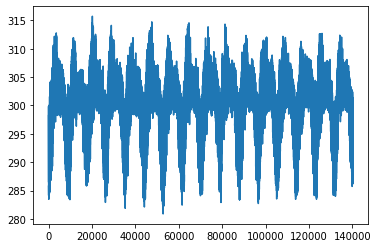

In [5]:
temp=df['Temperature(k)']
temp.plot()

In [6]:
# [[[1],[2],[3],[4],[5]]][6]
# [[[2],[3],[4],[5],[6]]][7]
# [[3,4,5,6,7]][8]


In [7]:
def df_to_X_y(df,window_size=10):
    df_as_np=df.to_numpy()
    X=[]
    y=[]
    for i in range(len(df_as_np)-window_size):
        row=[[a]for a in df_as_np[i:i+10]]
        X.append(row)
        label=df_as_np[i+10]
        y.append(label)
    return np.array(X), np.array(y)    

In [8]:
WINDOW_SIZE=10
X,y=df_to_X_y(temp,WINDOW_SIZE)
X.shape,y.shape


((140246, 10, 1), (140246,))

In [9]:
X


array([[[285.7691173],
        [284.9650341],
        [287.1658139],
        ...,
        [298.3135128],
        [298.9538935],
        [299.8515211]],

       [[284.9650341],
        [287.1658139],
        [292.6700027],
        ...,
        [298.9538935],
        [299.8515211],
        [295.3126303]],

       [[287.1658139],
        [292.6700027],
        [293.3616337],
        ...,
        [299.8515211],
        [295.3126303],
        [294.7961461]],

       ...,

       [[296.1764244],
        [295.168485 ],
        [295.2294044],
        ...,
        [290.7782595],
        [291.1885845],
        [290.636282 ]],

       [[295.168485 ],
        [295.2294044],
        [293.5790421],
        ...,
        [291.1885845],
        [290.636282 ],
        [290.8870082]],

       [[295.2294044],
        [293.5790421],
        [291.3104233],
        ...,
        [290.636282 ],
        [290.8870082],
        [290.1947421]]])

In [10]:
y

array([295.3126303, 294.7961461, 292.7257312, ..., 290.8870082,
       290.1947421, 290.1252638])

In [11]:
X_train, y_train=X[:100000],y[:100000]
X_val, y_val=X[100000:110000],y[100000:110000]
X_test, y_test=X[110000:],y[110000:]
X_train.shape,y_train.shape,X_val.shape, y_val.shape,X_test.shape,y_test.shape

((100000, 10, 1),
 (100000,),
 (10000, 10, 1),
 (10000,),
 (30246, 10, 1),
 (30246,))

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1=Sequential()
model1.add(InputLayer((10,1)))
model1.add(LSTM(64))
model1.add(Dense(8,'relu'))
model1.add(Dense(1,'linear'))

model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [13]:
cp=ModelCheckpoint('model1/',save_best_only=True)
model1.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])

In [14]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100,callbacks=[cp])

Epoch 1/100
3124/3125 [============================>.] - ETA: 0s - loss: 84840.7891 - root_mean_squared_error: 291.2744

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 25s 7ms/step - loss: 84838.8438 - root_mean_squared_error: 291.2711 - val_loss: 78874.7109 - val_root_mean_squared_error: 280.8464
Epoch 2/100
3116/3125 [============================>.] - ETA: 0s - loss: 69495.1719 - root_mean_squared_error: 263.6194

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 23s 7ms/step - loss: 69466.6406 - root_mean_squared_error: 263.5652 - val_loss: 59787.7422 - val_root_mean_squared_error: 244.5153
Epoch 3/100
3116/3125 [============================>.] - ETA: 0s - loss: 48737.9258 - root_mean_squared_error: 220.7667

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 23s 7ms/step - loss: 48706.3203 - root_mean_squared_error: 220.6951 - val_loss: 37993.4258 - val_root_mean_squared_error: 194.9190
Epoch 4/100
3123/3125 [============================>.] - ETA: 0s - loss: 27241.8555 - root_mean_squared_error: 165.0511

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 22s 7ms/step - loss: 27235.7012 - root_mean_squared_error: 165.0324 - val_loss: 17678.8379 - val_root_mean_squared_error: 132.9618
Epoch 5/100
3124/3125 [============================>.] - ETA: 0s - loss: 10226.6250 - root_mean_squared_error: 101.1268

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 21s 7ms/step - loss: 10224.8076 - root_mean_squared_error: 101.1178 - val_loss: 4454.1694 - val_root_mean_squared_error: 66.7396
Epoch 6/100
3116/3125 [============================>.] - ETA: 0s - loss: 1604.7494 - root_mean_squared_error: 40.0593

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 23s 7ms/step - loss: 1600.6190 - root_mean_squared_error: 40.0077 - val_loss: 171.6268 - val_root_mean_squared_error: 13.1006
Epoch 7/100
3116/3125 [============================>.] - ETA: 0s - loss: 45.9079 - root_mean_squared_error: 6.7755

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 23s 7ms/step - loss: 45.8593 - root_mean_squared_error: 6.7719 - val_loss: 27.1244 - val_root_mean_squared_error: 5.2081
Epoch 8/100
3119/3125 [============================>.] - ETA: 0s - loss: 27.6679 - root_mean_squared_error: 5.2600

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 26s 8ms/step - loss: 27.6668 - root_mean_squared_error: 5.2599 - val_loss: 25.2034 - val_root_mean_squared_error: 5.0203
Epoch 9/100
3121/3125 [============================>.] - ETA: 0s - loss: 25.2168 - root_mean_squared_error: 5.0216

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 26s 8ms/step - loss: 25.2166 - root_mean_squared_error: 5.0216 - val_loss: 21.9258 - val_root_mean_squared_error: 4.6825
Epoch 10/100
3122/3125 [============================>.] - ETA: 0s - loss: 20.9718 - root_mean_squared_error: 4.5795

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 26s 8ms/step - loss: 20.9683 - root_mean_squared_error: 4.5791 - val_loss: 17.1122 - val_root_mean_squared_error: 4.1367
Epoch 11/100
3121/3125 [============================>.] - ETA: 0s - loss: 15.5376 - root_mean_squared_error: 3.9418

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 27s 9ms/step - loss: 15.5342 - root_mean_squared_error: 3.9413 - val_loss: 11.2105 - val_root_mean_squared_error: 3.3482
Epoch 12/100
3120/3125 [============================>.] - ETA: 0s - loss: 10.1177 - root_mean_squared_error: 3.1808

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 25s 8ms/step - loss: 10.1149 - root_mean_squared_error: 3.1804 - val_loss: 7.7655 - val_root_mean_squared_error: 2.7867
Epoch 13/100
3125/3125 [==============================] - ETA: 0s - loss: 6.7928 - root_mean_squared_error: 2.6063

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 27s 9ms/step - loss: 6.7928 - root_mean_squared_error: 2.6063 - val_loss: 4.8682 - val_root_mean_squared_error: 2.2064
Epoch 14/100
3124/3125 [============================>.] - ETA: 0s - loss: 5.1501 - root_mean_squared_error: 2.2694

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 24s 8ms/step - loss: 5.1497 - root_mean_squared_error: 2.2693 - val_loss: 3.7434 - val_root_mean_squared_error: 1.9348
Epoch 15/100
3118/3125 [============================>.] - ETA: 0s - loss: 4.1794 - root_mean_squared_error: 2.0444

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 25s 8ms/step - loss: 4.1780 - root_mean_squared_error: 2.0440 - val_loss: 3.5174 - val_root_mean_squared_error: 1.8755
Epoch 16/100
3116/3125 [============================>.] - ETA: 0s - loss: 3.5249 - root_mean_squared_error: 1.8775

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 25s 8ms/step - loss: 3.5247 - root_mean_squared_error: 1.8774 - val_loss: 2.5740 - val_root_mean_squared_error: 1.6044
Epoch 17/100
3125/3125 [==============================] - 19s 6ms/step - loss: 3.0096 - root_mean_squared_error: 1.7348 - val_loss: 2.6336 - val_root_mean_squared_error: 1.6228
Epoch 18/100
3125/3125 [==============================] - ETA: 0s - loss: 2.6770 - root_mean_squared_error: 1.6362

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 24s 8ms/step - loss: 2.6770 - root_mean_squared_error: 1.6362 - val_loss: 2.0358 - val_root_mean_squared_error: 1.4268
Epoch 19/100
3125/3125 [==============================] - ETA: 0s - loss: 2.4649 - root_mean_squared_error: 1.5700

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 25s 8ms/step - loss: 2.4649 - root_mean_squared_error: 1.5700 - val_loss: 1.8319 - val_root_mean_squared_error: 1.3535
Epoch 20/100
3125/3125 [==============================] - ETA: 0s - loss: 2.3007 - root_mean_squared_error: 1.5168

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 26s 8ms/step - loss: 2.3007 - root_mean_squared_error: 1.5168 - val_loss: 1.7964 - val_root_mean_squared_error: 1.3403
Epoch 21/100
3117/3125 [============================>.] - ETA: 0s - loss: 2.1857 - root_mean_squared_error: 1.4784

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 24s 8ms/step - loss: 2.1853 - root_mean_squared_error: 1.4783 - val_loss: 1.6891 - val_root_mean_squared_error: 1.2997
Epoch 22/100
3121/3125 [============================>.] - ETA: 0s - loss: 2.0915 - root_mean_squared_error: 1.4462

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 26s 8ms/step - loss: 2.0925 - root_mean_squared_error: 1.4465 - val_loss: 1.5778 - val_root_mean_squared_error: 1.2561
Epoch 23/100
3123/3125 [============================>.] - ETA: 0s - loss: 2.0205 - root_mean_squared_error: 1.4214

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 26s 8ms/step - loss: 2.0208 - root_mean_squared_error: 1.4215 - val_loss: 1.5200 - val_root_mean_squared_error: 1.2329
Epoch 24/100
3124/3125 [============================>.] - ETA: 0s - loss: 1.9375 - root_mean_squared_error: 1.3919

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 26s 8ms/step - loss: 1.9372 - root_mean_squared_error: 1.3918 - val_loss: 1.5129 - val_root_mean_squared_error: 1.2300
Epoch 25/100
3125/3125 [==============================] - 24s 8ms/step - loss: 1.8770 - root_mean_squared_error: 1.3700 - val_loss: 1.5584 - val_root_mean_squared_error: 1.2484
Epoch 26/100
3125/3125 [==============================] - 24s 8ms/step - loss: 1.8278 - root_mean_squared_error: 1.3520 - val_loss: 1.5526 - val_root_mean_squared_error: 1.2460
Epoch 27/100
3125/3125 [==============================] - ETA: 0s - loss: 1.8068 - root_mean_squared_error: 1.3442

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 28s 9ms/step - loss: 1.8068 - root_mean_squared_error: 1.3442 - val_loss: 1.4397 - val_root_mean_squared_error: 1.1999
Epoch 28/100
3121/3125 [============================>.] - ETA: 0s - loss: 1.7596 - root_mean_squared_error: 1.3265

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 27s 9ms/step - loss: 1.7604 - root_mean_squared_error: 1.3268 - val_loss: 1.3841 - val_root_mean_squared_error: 1.1765
Epoch 29/100
3119/3125 [============================>.] - ETA: 0s - loss: 1.7270 - root_mean_squared_error: 1.3142

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 26s 8ms/step - loss: 1.7261 - root_mean_squared_error: 1.3138 - val_loss: 1.3376 - val_root_mean_squared_error: 1.1566
Epoch 30/100
3125/3125 [==============================] - 23s 7ms/step - loss: 1.7075 - root_mean_squared_error: 1.3067 - val_loss: 1.6897 - val_root_mean_squared_error: 1.2999
Epoch 31/100
3119/3125 [============================>.] - ETA: 0s - loss: 1.7066 - root_mean_squared_error: 1.3064

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 28s 9ms/step - loss: 1.7061 - root_mean_squared_error: 1.3062 - val_loss: 1.2763 - val_root_mean_squared_error: 1.1297
Epoch 32/100
3124/3125 [============================>.] - ETA: 0s - loss: 1.6733 - root_mean_squared_error: 1.2936

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 28s 9ms/step - loss: 1.6732 - root_mean_squared_error: 1.2935 - val_loss: 1.2646 - val_root_mean_squared_error: 1.1245
Epoch 33/100
3125/3125 [==============================] - 24s 8ms/step - loss: 1.6493 - root_mean_squared_error: 1.2843 - val_loss: 1.3517 - val_root_mean_squared_error: 1.1626
Epoch 34/100
3125/3125 [==============================] - 24s 8ms/step - loss: 1.6602 - root_mean_squared_error: 1.2885 - val_loss: 1.3458 - val_root_mean_squared_error: 1.1601
Epoch 35/100
3125/3125 [==============================] - 24s 8ms/step - loss: 1.6522 - root_mean_squared_error: 1.2854 - val_loss: 1.4273 - val_root_mean_squared_error: 1.1947
Epoch 36/100
3125/3125 [==============================] - 24s 8ms/step - loss: 1.6497 - root_mean_squared_error: 1.2844 - val_loss: 1.6362 - val_root_mean_squared_error: 1.2791
Epoch 37/100
3125/3125 [==============================] - 25s 8ms/step - loss: 1.6215 - root_mean_squared_error: 1.2734 - val_lo

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 29s 9ms/step - loss: 1.6054 - root_mean_squared_error: 1.2671 - val_loss: 1.2440 - val_root_mean_squared_error: 1.1154
Epoch 39/100
3119/3125 [============================>.] - ETA: 0s - loss: 1.5989 - root_mean_squared_error: 1.2645

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 29s 9ms/step - loss: 1.5983 - root_mean_squared_error: 1.2642 - val_loss: 1.2162 - val_root_mean_squared_error: 1.1028
Epoch 40/100
3125/3125 [==============================] - 24s 8ms/step - loss: 1.6158 - root_mean_squared_error: 1.2711 - val_loss: 1.2357 - val_root_mean_squared_error: 1.1116
Epoch 41/100
3125/3125 [==============================] - 24s 8ms/step - loss: 1.5850 - root_mean_squared_error: 1.2590 - val_loss: 1.2665 - val_root_mean_squared_error: 1.1254
Epoch 42/100
3125/3125 [==============================] - 24s 8ms/step - loss: 1.5897 - root_mean_squared_error: 1.2608 - val_loss: 1.4392 - val_root_mean_squared_error: 1.1997
Epoch 43/100
3119/3125 [============================>.] - ETA: 0s - loss: 1.5727 - root_mean_squared_error: 1.2541

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 30s 9ms/step - loss: 1.5724 - root_mean_squared_error: 1.2540 - val_loss: 1.1966 - val_root_mean_squared_error: 1.0939
Epoch 44/100
3125/3125 [==============================] - 25s 8ms/step - loss: 1.5723 - root_mean_squared_error: 1.2539 - val_loss: 1.2063 - val_root_mean_squared_error: 1.0983
Epoch 45/100
3123/3125 [============================>.] - ETA: 0s - loss: 1.5662 - root_mean_squared_error: 1.2515

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 30s 9ms/step - loss: 1.5659 - root_mean_squared_error: 1.2514 - val_loss: 1.1807 - val_root_mean_squared_error: 1.0866
Epoch 46/100
3125/3125 [==============================] - 28s 9ms/step - loss: 1.5507 - root_mean_squared_error: 1.2453 - val_loss: 1.2482 - val_root_mean_squared_error: 1.1172
Epoch 47/100
3125/3125 [==============================] - 26s 8ms/step - loss: 1.5603 - root_mean_squared_error: 1.2491 - val_loss: 1.2075 - val_root_mean_squared_error: 1.0989
Epoch 48/100
3125/3125 [==============================] - 25s 8ms/step - loss: 1.5538 - root_mean_squared_error: 1.2465 - val_loss: 1.2255 - val_root_mean_squared_error: 1.1070
Epoch 49/100
3123/3125 [============================>.] - ETA: 0s - loss: 1.5410 - root_mean_squared_error: 1.2414

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 30s 10ms/step - loss: 1.5413 - root_mean_squared_error: 1.2415 - val_loss: 1.1697 - val_root_mean_squared_error: 1.0815
Epoch 50/100
3125/3125 [==============================] - 26s 8ms/step - loss: 1.5435 - root_mean_squared_error: 1.2424 - val_loss: 1.5483 - val_root_mean_squared_error: 1.2443
Epoch 51/100
3125/3125 [==============================] - 25s 8ms/step - loss: 1.5402 - root_mean_squared_error: 1.2411 - val_loss: 1.2837 - val_root_mean_squared_error: 1.1330
Epoch 52/100
3119/3125 [============================>.] - ETA: 0s - loss: 1.5395 - root_mean_squared_error: 1.2407

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 30s 9ms/step - loss: 1.5396 - root_mean_squared_error: 1.2408 - val_loss: 1.1647 - val_root_mean_squared_error: 1.0792
Epoch 53/100
3125/3125 [==============================] - 25s 8ms/step - loss: 1.5370 - root_mean_squared_error: 1.2398 - val_loss: 1.3707 - val_root_mean_squared_error: 1.1708
Epoch 54/100
3125/3125 [==============================] - 25s 8ms/step - loss: 1.5292 - root_mean_squared_error: 1.2366 - val_loss: 1.3050 - val_root_mean_squared_error: 1.1424
Epoch 55/100
3125/3125 [==============================] - 25s 8ms/step - loss: 1.5304 - root_mean_squared_error: 1.2371 - val_loss: 1.7717 - val_root_mean_squared_error: 1.3310
Epoch 56/100
3125/3125 [==============================] - 25s 8ms/step - loss: 1.5302 - root_mean_squared_error: 1.2370 - val_loss: 1.2183 - val_root_mean_squared_error: 1.1038
Epoch 57/100
3125/3125 [==============================] - 25s 8ms/step - loss: 1.5403 - root_mean_squared_error: 1.2411 - val_lo

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 25s 8ms/step - loss: 1.5013 - root_mean_squared_error: 1.2253 - val_loss: 1.1400 - val_root_mean_squared_error: 1.0677
Epoch 65/100
3125/3125 [==============================] - 21s 7ms/step - loss: 1.5162 - root_mean_squared_error: 1.2313 - val_loss: 1.7298 - val_root_mean_squared_error: 1.3152
Epoch 66/100
3125/3125 [==============================] - 20s 6ms/step - loss: 1.5150 - root_mean_squared_error: 1.2309 - val_loss: 1.1632 - val_root_mean_squared_error: 1.0785
Epoch 67/100
3125/3125 [==============================] - 22s 7ms/step - loss: 1.5152 - root_mean_squared_error: 1.2309 - val_loss: 1.3379 - val_root_mean_squared_error: 1.1567
Epoch 68/100
3125/3125 [==============================] - 1028s 329ms/step - loss: 1.5023 - root_mean_squared_error: 1.2257 - val_loss: 1.3050 - val_root_mean_squared_error: 1.1424
Epoch 69/100
3125/3125 [==============================] - 36s 12ms/step - loss: 1.5155 - root_mean_squared_error: 1.2310 - v

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 28s 9ms/step - loss: 1.4959 - root_mean_squared_error: 1.2231 - val_loss: 1.1369 - val_root_mean_squared_error: 1.0663
Epoch 75/100
3125/3125 [==============================] - 3245s 1s/step - loss: 1.5077 - root_mean_squared_error: 1.2279 - val_loss: 1.1505 - val_root_mean_squared_error: 1.0726
Epoch 76/100
3125/3125 [==============================] - 36s 11ms/step - loss: 1.4971 - root_mean_squared_error: 1.2236 - val_loss: 1.1379 - val_root_mean_squared_error: 1.0667
Epoch 77/100
3122/3125 [============================>.] - ETA: 0s - loss: 1.4925 - root_mean_squared_error: 1.2217

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 42s 14ms/step - loss: 1.4923 - root_mean_squared_error: 1.2216 - val_loss: 1.1322 - val_root_mean_squared_error: 1.0640
Epoch 78/100
3125/3125 [==============================] - 43s 14ms/step - loss: 1.5045 - root_mean_squared_error: 1.2266 - val_loss: 1.6834 - val_root_mean_squared_error: 1.2975
Epoch 79/100
3125/3125 [==============================] - 39s 13ms/step - loss: 1.4993 - root_mean_squared_error: 1.2244 - val_loss: 1.2650 - val_root_mean_squared_error: 1.1247
Epoch 80/100
3125/3125 [==============================] - 35s 11ms/step - loss: 1.4897 - root_mean_squared_error: 1.2206 - val_loss: 1.1574 - val_root_mean_squared_error: 1.0758
Epoch 81/100
3123/3125 [============================>.] - ETA: 0s - loss: 1.4857 - root_mean_squared_error: 1.2189

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 44s 14ms/step - loss: 1.4858 - root_mean_squared_error: 1.2189 - val_loss: 1.1250 - val_root_mean_squared_error: 1.0607
Epoch 82/100
3125/3125 [==============================] - 36s 12ms/step - loss: 1.4849 - root_mean_squared_error: 1.2186 - val_loss: 1.1849 - val_root_mean_squared_error: 1.0885
Epoch 83/100
3125/3125 [==============================] - 36s 12ms/step - loss: 1.5018 - root_mean_squared_error: 1.2255 - val_loss: 1.2359 - val_root_mean_squared_error: 1.1117
Epoch 84/100
3125/3125 [==============================] - 37s 12ms/step - loss: 1.4875 - root_mean_squared_error: 1.2196 - val_loss: 1.2472 - val_root_mean_squared_error: 1.1168
Epoch 85/100
3125/3125 [==============================] - 37s 12ms/step - loss: 1.4943 - root_mean_squared_error: 1.2224 - val_loss: 1.2257 - val_root_mean_squared_error: 1.1071
Epoch 86/100
3125/3125 [==============================] - 37s 12ms/step - loss: 1.4846 - root_mean_squared_error: 1.2184 - 

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 44s 14ms/step - loss: 1.4899 - root_mean_squared_error: 1.2206 - val_loss: 1.1211 - val_root_mean_squared_error: 1.0588
Epoch 88/100
3125/3125 [==============================] - 36s 12ms/step - loss: 1.4903 - root_mean_squared_error: 1.2208 - val_loss: 1.1296 - val_root_mean_squared_error: 1.0628
Epoch 89/100
3125/3125 [==============================] - 36s 12ms/step - loss: 1.4857 - root_mean_squared_error: 1.2189 - val_loss: 1.2736 - val_root_mean_squared_error: 1.1286
Epoch 90/100
3125/3125 [==============================] - 36s 12ms/step - loss: 1.4986 - root_mean_squared_error: 1.2242 - val_loss: 1.1302 - val_root_mean_squared_error: 1.0631
Epoch 91/100
3125/3125 [==============================] - 36s 11ms/step - loss: 1.4896 - root_mean_squared_error: 1.2205 - val_loss: 1.5571 - val_root_mean_squared_error: 1.2478
Epoch 92/100
3125/3125 [==============================] - 36s 12ms/step - loss: 1.4875 - root_mean_squared_error: 1.2196 - 

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 43s 14ms/step - loss: 1.4775 - root_mean_squared_error: 1.2155 - val_loss: 1.1187 - val_root_mean_squared_error: 1.0577
Epoch 96/100
3125/3125 [==============================] - 35s 11ms/step - loss: 1.4910 - root_mean_squared_error: 1.2211 - val_loss: 1.1269 - val_root_mean_squared_error: 1.0616
Epoch 97/100
3125/3125 [==============================] - 39s 12ms/step - loss: 1.4775 - root_mean_squared_error: 1.2155 - val_loss: 1.1975 - val_root_mean_squared_error: 1.0943
Epoch 98/100
3125/3125 [==============================] - 34s 11ms/step - loss: 1.4880 - root_mean_squared_error: 1.2199 - val_loss: 1.1359 - val_root_mean_squared_error: 1.0658
Epoch 99/100
3121/3125 [============================>.] - ETA: 0s - loss: 1.4715 - root_mean_squared_error: 1.2131

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


3125/3125 [==============================] - 46s 15ms/step - loss: 1.4716 - root_mean_squared_error: 1.2131 - val_loss: 1.1171 - val_root_mean_squared_error: 1.0569
Epoch 100/100
3125/3125 [==============================] - 34s 11ms/step - loss: 1.4897 - root_mean_squared_error: 1.2205 - val_loss: 1.3907 - val_root_mean_squared_error: 1.1793


In [15]:
# from tensorflow.keras.models import load_model
# model1=load_model('model1/')

In [16]:
train_predictions=model1.predict(X_train).flatten()
train_results=pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals': y_train})
train_results

3125/3125 [==============================] - 18s 5ms/step


,Train Predictions,Actuals
0,300.312592,295.312630
1,295.047455,294.796146
2,294.055573,292.725731
3,292.330139,292.691398
4,292.609131,290.337365
...,...,...
99995,300.714508,301.070413
99996,300.996185,300.684479
99997,300.670288,300.808103
99998,300.800140,302.463514


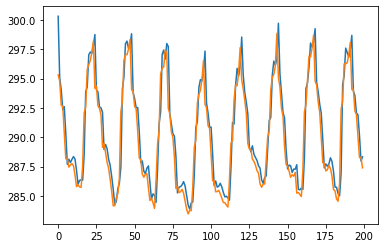

In [17]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:200])
plt.plot(train_results['Actuals'][:200])

In [18]:
val_predictions=model1.predict(X_val).flatten()
val_results=pd.DataFrame(data={'Val Predictions': val_predictions, 'Actuals': y_val})
val_results

313/313 [==============================] - 2s 5ms/step


,Val Predictions,Actuals
0,302.884369,304.740678
1,304.967133,304.905336
2,305.090851,304.895467
3,304.803894,306.302592
4,306.211487,307.674916
...,...,...
9995,304.908295,305.049575
9996,304.720032,303.979461
9997,303.565582,303.064459
9998,302.584442,303.085174


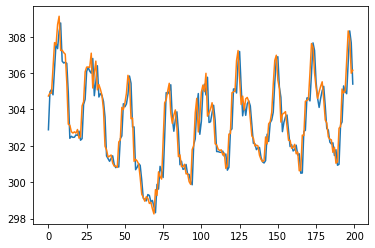

In [19]:
import matplotlib.pyplot as plt
plt.plot(val_results['Val Predictions'][:200])
plt.plot(val_results['Actuals'][:200])

In [20]:
test_predictions=model1.predict(X_test).flatten()
test_results=pd.DataFrame(data={'Test Predictions': test_predictions, 'Actuals': y_test})
test_results

946/946 [==============================] - 5s 5ms/step


,Test Predictions,Actuals
0,302.151093,302.508687
1,302.297394,302.481909
2,302.365143,301.825088
3,301.667145,301.939274
4,301.791046,301.493141
...,...,...
30241,291.165588,291.188584
30242,291.665405,290.636282
30243,291.088501,290.887008
30244,291.299927,290.194742


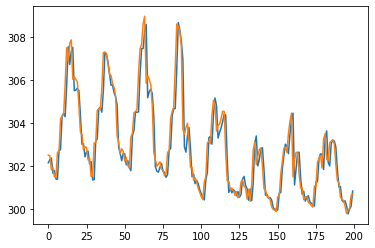

In [21]:
import matplotlib.pyplot as plt
plt.plot(test_results['Test Predictions'][:200])
plt.plot(test_results['Actuals'][:200])